In [1]:
import torch
import os
import numpy as np
from torch.optim.lr_scheduler import ExponentialLR
from utils.func_utils import normal_kl, gen_data, vae_loss
from model import VAE
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
n_steps = 500
test_loader, train_loader = gen_data(batch_size=512) 

base_vae = VAE(784, 50, 1024)
base_vae.cuda(1)
optimizer = torch.optim.Adam(base_vae.parameters(), lr=0.001)
lr_sheduler = ExponentialLR(optimizer, 0.96**(-1/1000) )
elbo_ =[]

for i in  tqdm_notebook(range(n_steps)):
    lr_sheduler.step()    
    for x in train_loader:
        x = x[0].cuda(1)
        logits, mu, log_sigma = base_vae(x)
        elbo = vae_loss(mu.cpu(), log_sigma.cpu(), logits.cpu(), x.cpu())
        elbo_.append(elbo.data)
        optimizer.zero_grad()
        elbo.backward()
        optimizer.step()

A Jupyter Widget

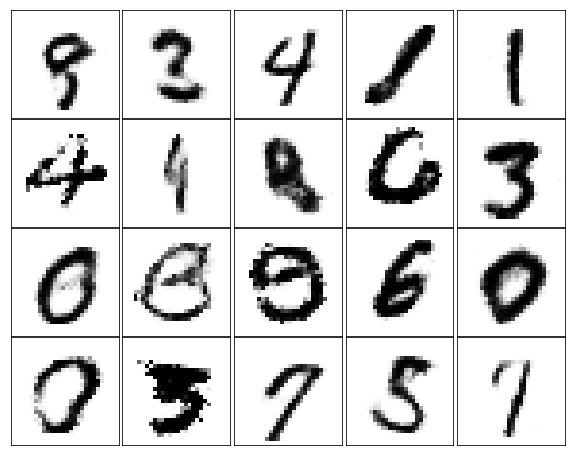

In [27]:
base_vae.cpu()
fig, ax = plt.subplots(4,5,figsize=(10,8))
for i in range(20):
    s = base_vae.sample(torch.randn((1, 50)))
    ax[i//5, i%5].imshow(np.array(s.data.cpu()).reshape(28,28), cmap='gray_r')
    ax[i//5, i%5].set_xticks([])
    ax[i//5, i%5].set_yticks([]);
plt.subplots_adjust(wspace=0.0005, hspace=0.01)

In [28]:
fig.savefig('vanilla_vae.png',bbox_inches='tight')